In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from src.structural_models.synthetic_data import SimpleSCM
import torch

In [72]:
SCM = SimpleSCM(100)
SCM.simulate_data()

# Classify data
y_pred, X_neg, clf = SCM.classify_data()
N_neg = X_neg.shape[0]
X_neg = torch.tensor(X_neg, dtype=torch.float64)

In [73]:
A = torch.rand(X_neg.shape)
beta = torch.rand(X_neg.shape)
fixed_ordering = torch.arange(3).repeat(N_neg, 1)
S = torch.eye(X_neg.shape[1])[torch.argsort(fixed_ordering)].to(int)

In [74]:
i=0
U = SCM.scm.abduction(X_neg)
U += A * S[:, i]
X_prime = SCM.scm.prediction(U)

In [75]:
W_adjacency = torch.tensor([[0, 0.5, 0.35], [0, 0, 0.3], [0, 0, 0]])
W_temp = W_adjacency + torch.eye(W_adjacency.shape[0])

In [76]:
X_prime_lin = X_neg.clone()
X_prime_lin += (A * S[:,i]) @ W_temp

In [77]:
X_prime_lin - X_prime

tensor([[ 0.0000e+00,  0.0000e+00, -3.3691e-09],
        [ 0.0000e+00,  0.0000e+00, -2.0617e-08],
        [ 0.0000e+00,  0.0000e+00, -5.0974e-09],
        [ 0.0000e+00,  0.0000e+00, -1.8036e-09],
        [ 0.0000e+00,  0.0000e+00,  1.6832e-08],
        [ 0.0000e+00,  0.0000e+00, -2.6672e-09],
        [ 0.0000e+00,  0.0000e+00,  3.8623e-09],
        [ 0.0000e+00,  0.0000e+00,  4.3408e-10],
        [ 0.0000e+00,  0.0000e+00, -1.9811e-08],
        [ 0.0000e+00,  0.0000e+00,  3.7525e-09],
        [ 0.0000e+00,  0.0000e+00,  3.9196e-08],
        [ 0.0000e+00,  0.0000e+00, -8.1897e-09],
        [ 0.0000e+00,  0.0000e+00, -6.2000e-09],
        [ 0.0000e+00,  0.0000e+00,  3.8917e-09],
        [ 0.0000e+00,  0.0000e+00,  1.6815e-08],
        [ 0.0000e+00,  0.0000e+00,  5.6955e-08],
        [ 0.0000e+00,  0.0000e+00,  7.7866e-09],
        [ 0.0000e+00,  0.0000e+00, -1.9717e-08],
        [ 0.0000e+00,  0.0000e+00,  2.0808e-09],
        [ 0.0000e+00,  0.0000e+00, -2.9515e-08],
        [ 0.0000e+00

In [80]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
results = np.load('results/simple_scm_noise_results.npy')

In [9]:
W_range = np.linspace(0, 2, 10)
e_range = np.linspace(0, 2, 10)

In [10]:
plot(W_range, e_range, results, 'simple_scm_noise_results')

NameError: name 'plot' is not defined

In [82]:
results = np.load('results/simpleSCM_comparison_results.npy')*100

labels = np.array([5, 10, 20, 50, 100])

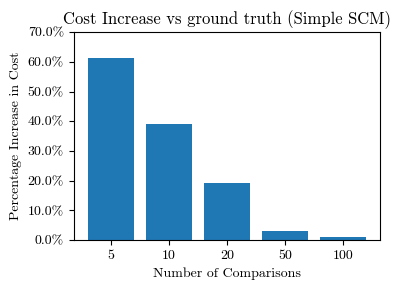

In [83]:
# Matplotlib setup
plt.rcParams["savefig.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = "cmr10"
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["axes.unicode_minus"] = False
matplotlib.rcParams["font.size"] = "10"
plt.rcParams["figure.figsize"] = (4, 3)

x_values = [1, 2, 3, 4, 5]

# Create the y-axis ticks with percentage signs
y_ticks = np.arange(0, results.max() + 10, 10)
y_labels = [f'{i}%' for i in y_ticks]

# Plot with the new y axis labels
plt.bar(x_values, results, align='center')
plt.xlabel('Number of Comparisons')
plt.ylabel('Percentage Increase in Cost')
plt.title('Cost Increase vs ground truth (Simple SCM)')
plt.xticks(x_values, labels)
plt.yticks(y_ticks, y_labels)
plt.tight_layout()
plt.savefig('plots/simpleSCM_comparison_results.png')

plt.show()
